# Principal Component Analysis (PCA)

In [ ]:
import requests
import pandas as pd
import time
from tqdm import tqdm

# Load cleaned dataset
df = pd.read_csv("guardian_cleaned_dataset.csv")

Extracting Numerical Features from Text for PCA

In [ ]:
tfidf_file_path = "/mnt/data/tfidf_numerical_dataset.csv"
tfidf_df.to_csv(tfidf_file_path, index=False)

# Print the first 5 rows of the TF-IDF dataset to confirm its contents
print(tfidf_df.head())


   able  access  according  act    action  actually     added  administration  \
0   0.0     0.0   0.089128  0.0  0.000000   0.00000  0.000000             0.0   
1   0.0     0.0   0.000000  0.0  0.000000   0.00000  0.000000             0.0   
2   0.0     0.0   0.000000  0.0  0.000000   0.00000  0.035948             0.0   
3   0.0     0.0   0.051241  0.0  0.065094   0.06754  0.052672             0.0   
4   0.0     0.0   0.000000  0.0  0.000000   0.00000  0.000000             0.0   

   age    agency  ...      work   workers   working     world     wrote  \
0  0.0  0.000000  ...  0.114784  0.622717  0.191822  0.000000  0.000000   
1  0.0  0.000000  ...  0.027966  0.000000  0.000000  0.000000  0.000000   
2  0.0  0.000000  ...  0.000000  0.000000  0.037633  0.000000  0.000000   
3  0.0  0.000000  ...  0.131983  0.000000  0.055141  0.000000  0.070074   
4  0.0  0.052907  ...  0.000000  0.000000  0.000000  0.030971  0.000000   

       year  yearold     years     young     youre  
0  0.0312

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply normalization
scaled_data = scaler.fit_transform(tfidf_df)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=tfidf_df.columns)

# Print the first few rows of the normalized dataset
print(scaled_df.head())

       able    access  according       act    action  actually     added  \
0 -0.413369 -0.276115   1.918023 -0.281915 -0.328406 -0.319673 -0.481465   
1 -0.413369 -0.276115  -0.485149 -0.281915 -0.328406 -0.319673 -0.481465   
2 -0.413369 -0.276115  -0.485149 -0.281915 -0.328406 -0.319673  0.569981   
3 -0.413369 -0.276115   0.896477 -0.281915  1.620255  1.987204  1.059151   
4 -0.413369 -0.276115  -0.485149 -0.281915 -0.328406 -0.319673 -0.481465   

   administration       age    agency  ...      work    workers   working  \
0       -0.270818 -0.278783 -0.247837  ...  1.762256  10.940713  4.333555   
1       -0.270818 -0.278783 -0.247837  ...  0.011488  -0.186352 -0.399506   
2       -0.270818 -0.278783 -0.247837  ... -0.552477  -0.186352  0.529054   
3       -0.270818 -0.278783 -0.247837  ...  2.109085  -0.186352  0.961054   
4       -0.270818 -0.278783  1.188196  ... -0.552477  -0.186352 -0.399506   

      world     wrote      year   yearold     years     young     youre  
0 -0.5

PCA with 2 components

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with 2 components
pca_2d = PCA(n_components=2)

# Apply PCA transformation
pca_2d_data = pca_2d.fit_transform(scaled_df)

# Convert to DataFrame
pca_2d_df = pd.DataFrame(pca_2d_data, columns=["PC1", "PC2"])

# Print the first few rows
print(pca_2d_df.head())

# Check how much variance is retained
explained_variance_2d = pca_2d.explained_variance_ratio_.sum()
print(f"Percentage of variance retained in 2D: {explained_variance_2d * 100:.2f}%")

        PC1       PC2
0 -4.467673 -1.011756
1 -4.291363  0.949549
2 -3.866341  2.194866
3 -1.362329  0.981183
4  2.020705 -1.163734
Percentage of variance retained in 2D: 4.35%


2D PCA Scatter Plot

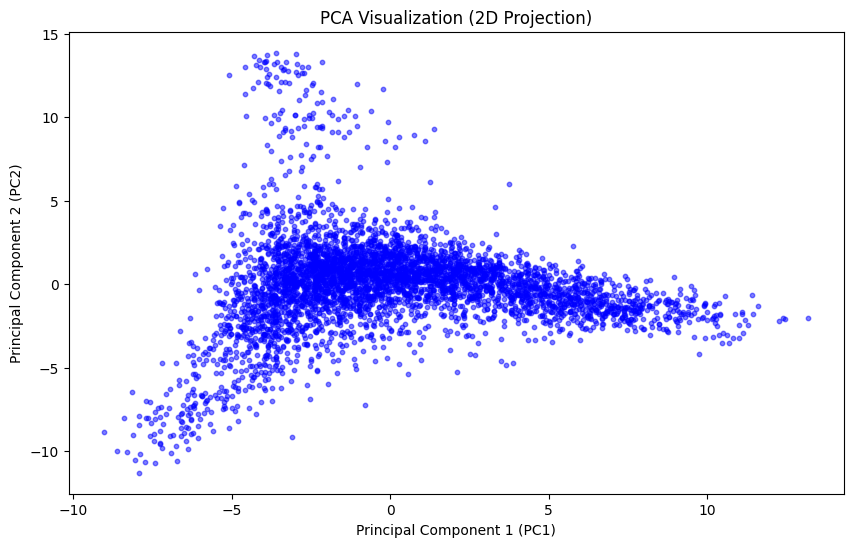

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(pca_2d_df["PC1"], pca_2d_df["PC2"], alpha=0.5, s=10, color='blue')

# Add title and labels
plt.title("PCA Visualization (2D Projection)")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")

# Show the plot
plt.show()

PCA with 3 components

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Initialize PCA with 3 components
pca_3d = PCA(n_components=3)

# Apply PCA transformation
pca_3d_data = pca_3d.fit_transform(scaled_df)

# Convert to DataFrame
pca_3d_df = pd.DataFrame(pca_3d_data, columns=["PC1", "PC2", "PC3"])

# Print the first few rows
print(pca_3d_df.head())

# Check how much variance is retained
explained_variance_3d = pca_3d.explained_variance_ratio_.sum()
print(f"Percentage of variance retained in 3D: {explained_variance_3d * 100:.2f}%")

        PC1       PC2       PC3
0 -4.467672 -1.013391  1.204253
1 -4.291382  0.949775  5.038292
2 -3.866397  2.194449  4.707107
3 -1.362335  0.981421  4.325213
4  2.020715 -1.164722  3.955824
Percentage of variance retained in 3D: 5.87%


3D PCA Scatter Plot

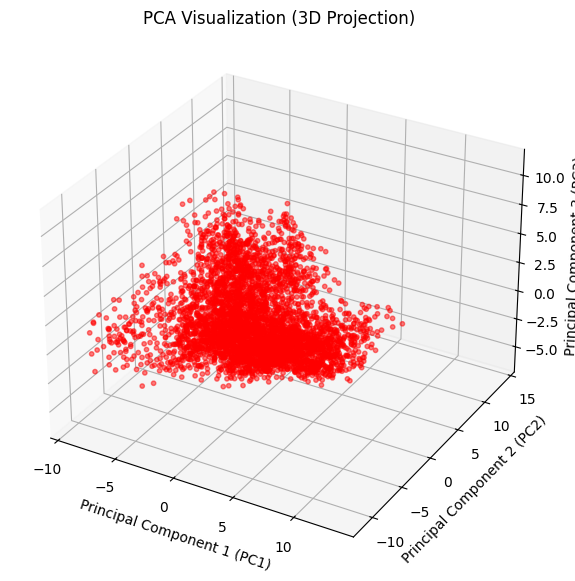

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create 3D scatter plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of 3D PCA-transformed data
ax.scatter(pca_3d_df["PC1"], pca_3d_df["PC2"], pca_3d_df["PC3"], alpha=0.5, s=10, color='red')

# Add title and labels
ax.set_title("PCA Visualization (3D Projection)")
ax.set_xlabel("Principal Component 1 (PC1)")
ax.set_ylabel("Principal Component 2 (PC2)")
ax.set_zlabel("Principal Component 3 (PC3)")

# Show the plot
plt.show()

Find the Number of Components Needed for 95% Variance

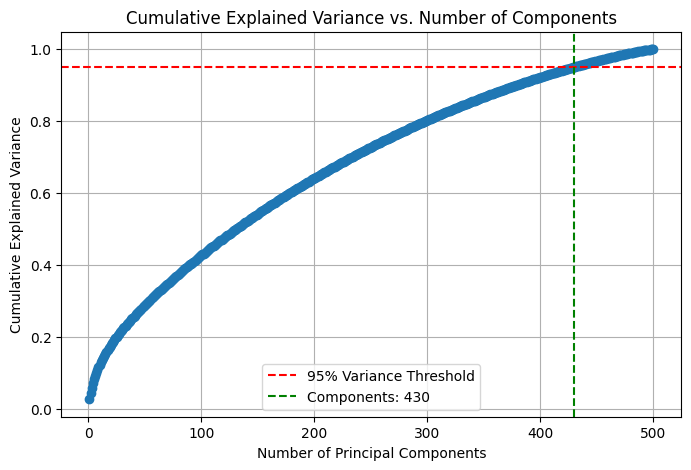

430

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Perform PCA on the full dataset
pca_full = PCA().fit(scaled_df)

# Calculate cumulative variance explained
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find the number of components that explain at least 95% variance
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
plt.axvline(x=num_components_95, color='g', linestyle='--', label=f"Components: {num_components_95}")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.legend()
plt.grid(True)
plt.show()

# Print the number of components needed
num_components_95


Reduce Dataset to 430 Principal Components

In [ ]:
# Apply PCA with 430 components (95% variance retention)
pca_430 = PCA(n_components=430)
pca_430_data = pca_430.fit_transform(scaled_df)

# Convert back to DataFrame
pca_430_df = pd.DataFrame(pca_430_data)

# Display first few rows
print(pca_430_df.head())

# Save the reduced dataset
pca_430_file_path = "/content/pca_430_reduced_dataset.csv"
pca_430_df.to_csv(pca_430_file_path, index=False)

# Provide download link
print(f"PCA Reduced Dataset saved: {pca_430_file_path}")

        0         1         2         3         4         5         6    \
0 -4.467672 -1.014044  1.207392 -0.813914  0.995996  2.158932  0.191471   
1 -4.291396  0.949512  5.042390  2.229554  1.330769 -0.206215 -0.993561   
2 -3.866387  2.193301  4.714504  1.120720  2.840725 -0.924190 -1.272527   
3 -1.362303  0.980758  4.326444 -2.145466  2.763957  1.398849  0.430538   
4  2.020747 -1.164923  3.954247 -1.837648  0.558414  2.682640 -0.114065   

        7         8         9    ...       420       421       422       423  \
0  0.101489 -2.278183 -1.056841  ...  0.540118  0.084682 -0.329944  0.125119   
1  3.775376  4.232414  3.521824  ...  0.335381 -0.134657 -0.240237  0.132160   
2  4.197836  2.134930  1.982039  ... -0.545315  0.556541 -0.229450  0.537852   
3  0.719828 -0.678889 -1.644018  ...  1.661290  0.777788  0.287780 -0.203657   
4  0.071088 -0.156607 -1.942116  ... -0.579469  1.548479  0.769328  0.180161   

        424       425       426       427       428       429  
0  0

In [ ]:
# Extract the eigenvalues from the PCA model
eigenvalues = pca_430.explained_variance_

# Get the top three eigenvalues
top_3_eigenvalues = eigenvalues[:3]

# Display the top three eigenvalues
print("Top 3 Eigenvalues:")
print(top_3_eigenvalues)

Top 3 Eigenvalues:
[13.71274701  8.06482251  7.59235449]


The top three eigenvalues (13.71, 8.06, and 7.59) indicate the most significant principal components contributing to variance in the dataset. These values suggest that the first principal component captures the most information, followed by the second and third.

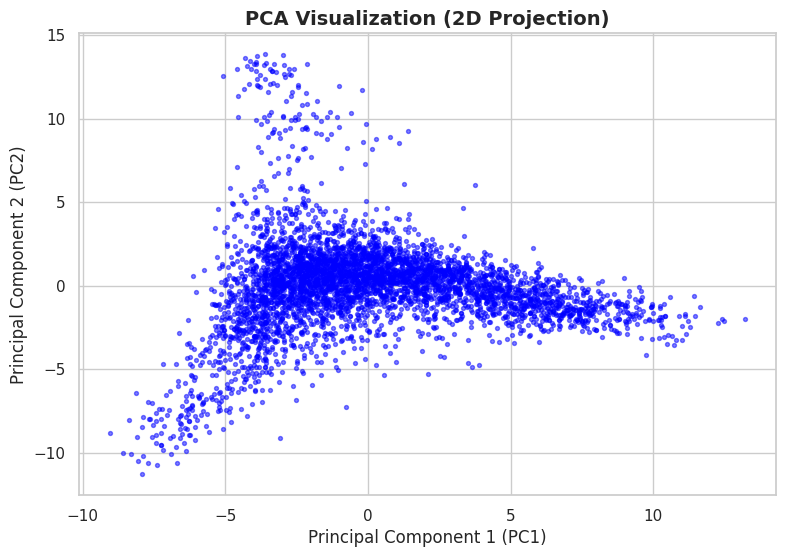

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Apply PCA on the dataset with n_components = 2 for 2D visualization
pca_2d = PCA(n_components=2)
pca_2d_transformed = pca_2d.fit_transform(scaled_df)

# Apply PCA on the dataset with n_components = 3 for 3D visualization
pca_3d = PCA(n_components=3)
pca_3d_transformed = pca_3d.fit_transform(scaled_df)

# Cumulative explained variance for all components
pca_full = PCA().fit(scaled_df)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find number of components for 95% variance
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

# Plot 2D PCA Scatter Plot with enhanced aesthetics
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")
plt.scatter(pca_2d_transformed[:, 0], pca_2d_transformed[:, 1], c='blue', alpha=0.5, s=8)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.title('PCA Visualization (2D Projection)', fontsize=14, fontweight='bold')
plt.show()

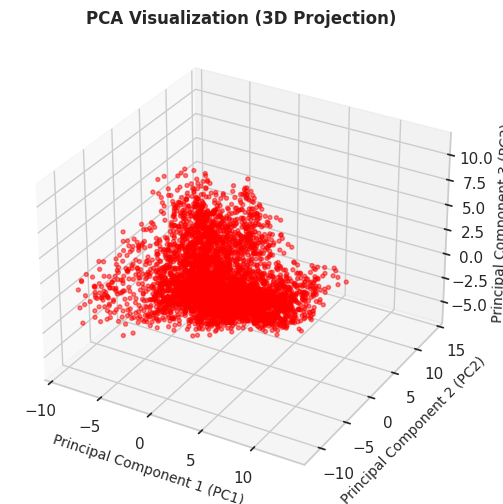

In [ ]:
# Plot 3D PCA Scatter Plot with enhanced aesthetics
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d_transformed[:, 0], pca_3d_transformed[:, 1], pca_3d_transformed[:, 2],
           c='red', alpha=0.5, s=8)
ax.set_xlabel('Principal Component 1 (PC1)', fontsize=10)
ax.set_ylabel('Principal Component 2 (PC2)', fontsize=10)
ax.set_zlabel('Principal Component 3 (PC3)', fontsize=10)
ax.set_title('PCA Visualization (3D Projection)', fontsize=12, fontweight='bold')
plt.show()

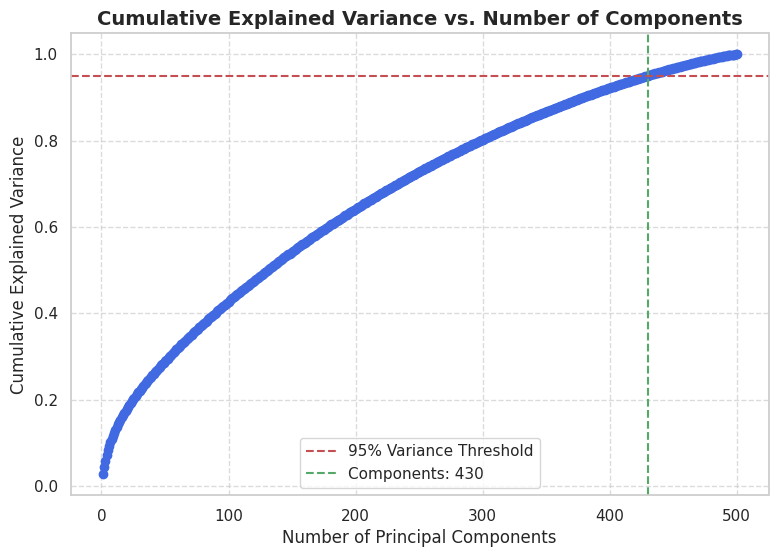

In [ ]:
# Plot cumulative variance graph with enhanced visualization
plt.figure(figsize=(9, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='royalblue')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
plt.axvline(x=num_components_95, color='g', linestyle='--', label=f"Components: {num_components_95}")
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Cumulative Explained Variance vs. Number of Components', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Data Selection & Preprocessing

For this project, PCA was applied to a dataset transformed using Term Frequency-Inverse Document Frequency (TF-IDF), a numerical representation of textual data. The dataset originally contained 500 features, which were normalized using Sklearn’s StandardScaler to ensure that each variable contributed equally to the analysis. Standardization was necessary as PCA is sensitive to varying scales in the data, and scaling ensures that all features have a mean of zero and a standard deviation of one. This preprocessing step enabled a fair comparison of variance contributions across features.

###Key Findings and Results

Two-Dimensional PCA Projection

A 2D projection of the dataset was created using the first two principal components. However, after reducing the dataset to two dimensions, it retained only 4.35% of the total variance. This means that a significant amount of information was lost in the process. The resulting scatter plot visualized the distribution of data in two principal dimensions, providing an overview of how the data points cluster when represented in a simplified space.

Three-Dimensional PCA Projection

To capture a more meaningful representation, PCA was applied again using three principal components, which resulted in 5.87% variance retention. Although this was slightly better than the 2D representation, it still indicated that more dimensions were needed to retain a significant portion of the information. A 3D scatter plot was generated to visualize the dataset, helping in understanding the spread and structure of the principal components in three-dimensional space.

Determining the Number of Principal Components for 95% Variance Retention

To ensure that at least 95% of the variance was retained, PCA was applied iteratively, and a cumulative explained variance graph was plotted. The graph illustrated how the variance accumulated as more principal components were included. From the analysis, it was determined that a total of 430 components were required to retain 95% of the dataset’s original variance. This result meant that even though the original dataset had 500 features, 70 dimensions were redundant and could be removed without significant loss of information.

Eigenvalues and Principal Components

Eigenvalues in PCA represent the amount of variance contributed by each principal component. The top three eigenvalues were 13.71, 8.06, and 7.59, indicating that the first three principal components carried the most information from the dataset. These components helped in understanding the most influential patterns in the data while reducing redundancy.



# Clustering

In [ ]:
import pandas as pd

df = pd.read_csv("guardian_cleaned_dataset.csv")

# Display basic information
print("\n🔹 Dataset Shape:", df.shape)
print("\n🔹 Column Data Types:\n", df.dtypes)
print("\n🔹 Missing Values:\n", df.isnull().sum())




🔹 Dataset Shape: (4425, 9)

🔹 Column Data Types:
 id                   object
headline             object
section              object
publication_date     object
url                  object
author               object
keywords             object
body_text            object
sentiment           float64
dtype: object

🔹 Missing Values:
 id                    0
headline              0
section               0
publication_date      0
url                   0
author              213
keywords             10
body_text             0
sentiment             0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Drop unnecessary columns
df.drop(columns=['id', 'headline', 'publication_date', 'url', 'author', 'body_text'], inplace=True)

# Handle missing values correctly
df.loc[:, 'keywords'] = df['keywords'].fillna("Unknown")

# Convert categorical column 'section' using one-hot encoding
df = pd.get_dummies(df, columns=['section'], drop_first=True)

# Convert 'keywords' using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['keywords'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Drop original 'keywords' column and concatenate TF-IDF results
df.drop(columns=['keywords'], inplace=True)
df = pd.concat([df, tfidf_df], axis=1)

# Normalize all numerical columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display first few rows
print(df_scaled.head())

# Save processed dataset
processed_file_path = "/content/processed_clustering_dataset.csv"
df_scaled.to_csv(processed_file_path, index=False)
print(f"Processed dataset saved at: {processed_file_path}")


   sentiment  section_Culture  section_Education  section_Environment  \
0   1.165245        -0.356513          -0.329343            -0.356915   
1   0.761306        -0.356513          -0.329343            -0.356915   
2  -0.181218        -0.356513          -0.329343            -0.356915   
3  -0.181218        -0.356513          -0.329343            -0.356915   
4  -0.181218        -0.356513          -0.329343            -0.356915   

   section_Politics  section_Science  section_Sport  section_Technology  \
0          2.804948        -0.356513        -0.3549           -0.356915   
1          2.804948        -0.356513        -0.3549           -0.356915   
2          2.804948        -0.356513        -0.3549           -0.356915   
3          2.804948        -0.356513        -0.3549           -0.356915   
4          2.804948        -0.356513        -0.3549           -0.356915   

   section_World news      2024  ...        tv        uk     union  \
0           -0.356915 -0.157402  ... -0.

Proceeding with Clustering

Find the Optimal K for K-Means

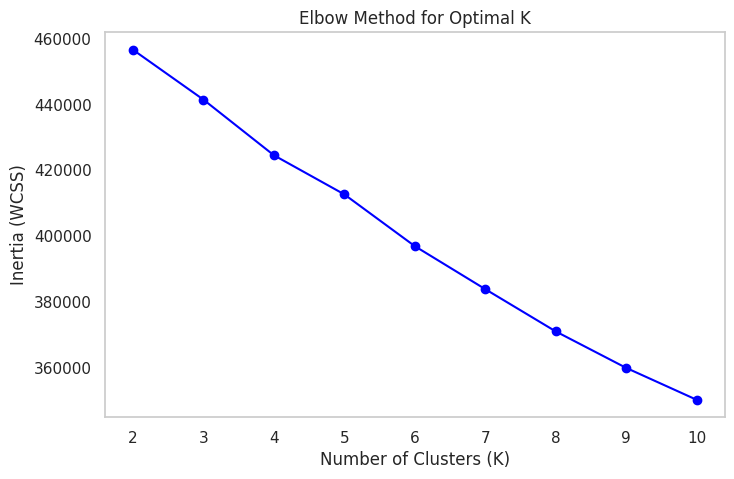

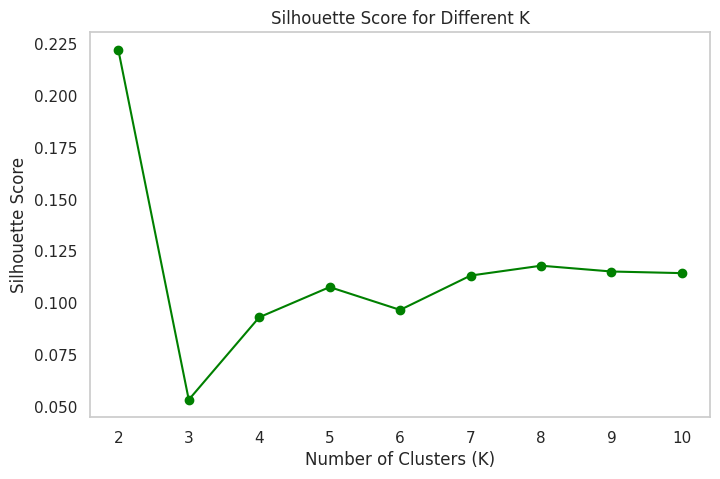

Best number of clusters (K) based on Silhouette Score: 2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Finding the optimal K using the Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Testing K from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='green')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.grid()
plt.show()

# Print the best K based on the highest Silhouette Score
best_k = K_range[np.argmax(silhouette_scores)]
print(f"Best number of clusters (K) based on Silhouette Score: {best_k}")


PCA to 3D & Percentage of Variance Retained

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Apply PCA to reduce to 3D
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_scaled)

# Calculate percentage of variance retained
variance_retained_3d = np.sum(pca_3d.explained_variance_ratio_) * 100

# Print variance retained
print(f"Percentage of variance retained after reducing to 3D: {variance_retained_3d:.2f}%")

# Convert to DataFrame
df_pca_3d = pd.DataFrame(df_pca_3d, columns=['PC1', 'PC2', 'PC3'])

# Save the PCA reduced dataset
df_pca_3d.to_csv("/content/pca_3d_clustering_dataset.csv", index=False)
print("PCA 3D Reduced Dataset saved as: /content/pca_3d_clustering_dataset.csv")


Percentage of variance retained after reducing to 3D: 14.74%
PCA 3D Reduced Dataset saved as: /content/pca_3d_clustering_dataset.csv


Since only 14.74% of the variance is retained after reducing to 3D, PCA is not a good choice for clustering in this case. This means too much information is lost, and the clusters formed in this reduced space may not be meaningful.



Implementing K-Means clustering

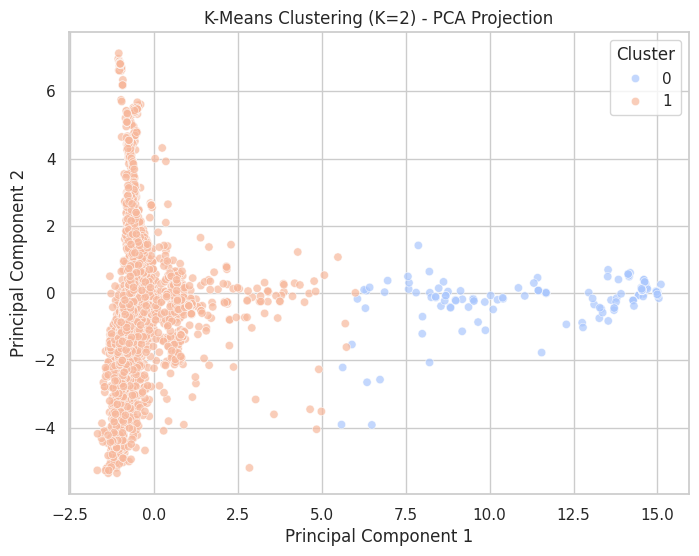

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Apply K-Means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop(columns=['Cluster']))

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_scaled['Cluster'], palette='coolwarm', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (K=2) - PCA Projection")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


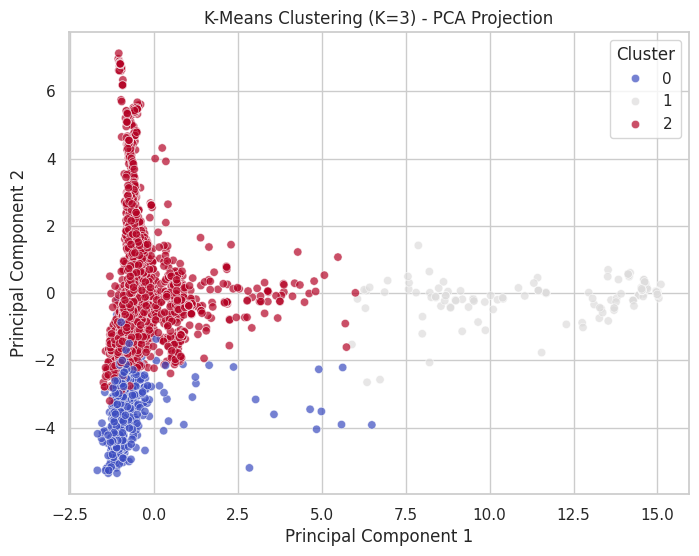

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Apply K-Means clustering with K=2
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop(columns=['Cluster']))

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_scaled['Cluster'], palette='coolwarm', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (K=3) - PCA Projection")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


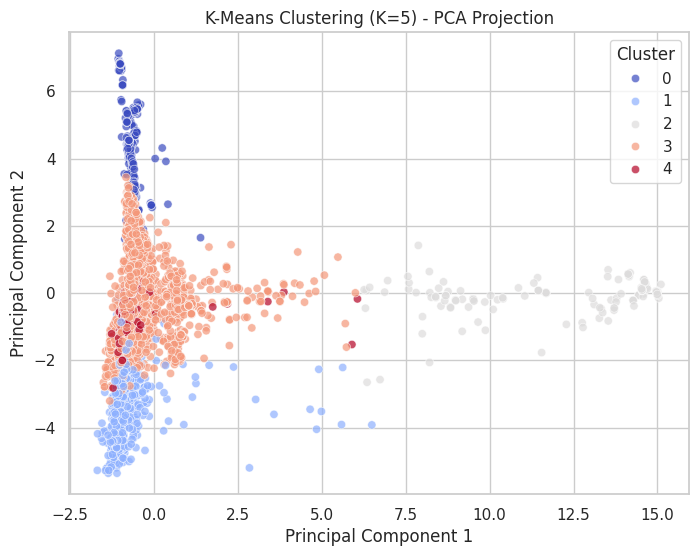

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Apply K-Means clustering with K=2
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop(columns=['Cluster']))

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_scaled['Cluster'], palette='coolwarm', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (K=5) - PCA Projection")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


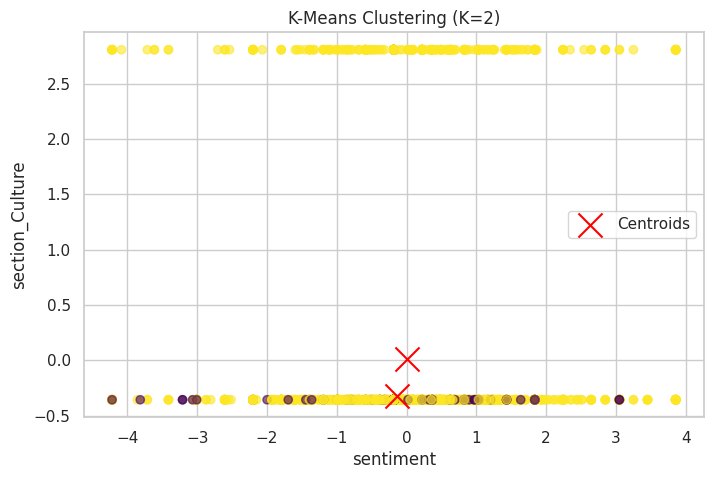

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply K-Means clustering using best K value (K=2)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize clustering in 2D using first two features
plt.figure(figsize=(8, 5))
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df_scaled['Cluster'], cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.xlabel(df_scaled.columns[0])
plt.ylabel(df_scaled.columns[1])
plt.title("K-Means Clustering (K=2)")
plt.legend()
plt.show()


hierarchical clustering and dendrogram generation:

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Initialize PCA with 3 components
pca_3d = PCA(n_components=3)

# Apply PCA transformation on the normalized dataset
pca_3d_data = pca_3d.fit_transform(scaled_df)

# Convert to DataFrame
pca_3d_clustering_df = pd.DataFrame(pca_3d_data, columns=["PC1", "PC2", "PC3"])

# Save the dataset (optional)
pca_3d_clustering_df.to_csv("/content/pca_3d_clustering_dataset.csv", index=False)

# Check how much variance is retained
explained_variance_3d = pca_3d.explained_variance_ratio_.sum()
print(f"Percentage of variance retained in 3D: {explained_variance_3d * 100:.2f}%")

# Print the first few rows to confirm
print(pca_3d_clustering_df.head())

Percentage of variance retained in 3D: 5.87%
        PC1       PC2       PC3
0 -4.467659 -1.013714  1.207299
1 -4.291411  0.953586  5.044995
2 -3.866419  2.197698  4.718445
3 -1.362297  0.981171  4.325741
4  2.020744 -1.165534  3.954719


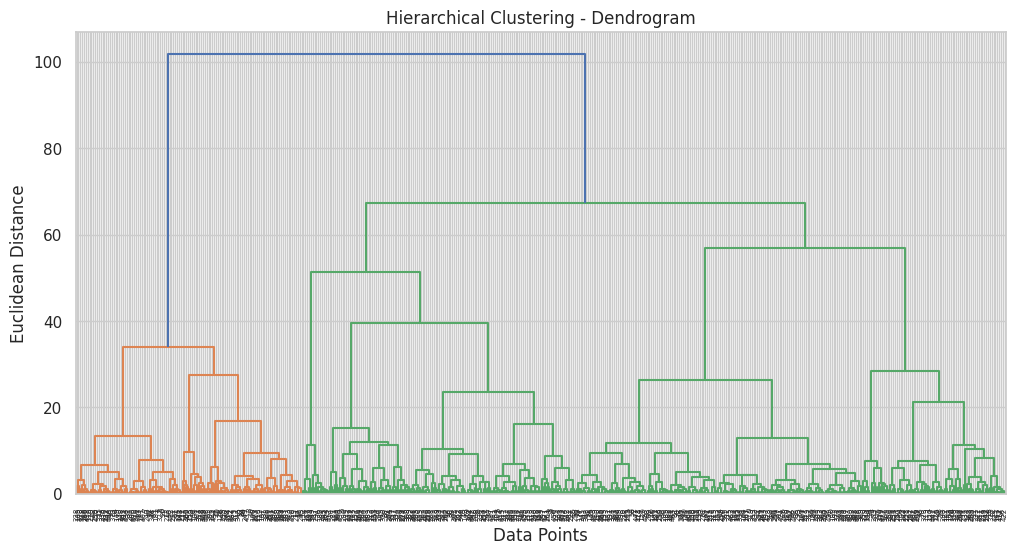

        PC1       PC2       PC3  Cluster
0 -4.467659 -1.013714  1.207299        0
1 -4.291411  0.953586  5.044995        0
2 -3.866419  2.197698  4.718445        0
3 -1.362297  0.981171  4.325741        0
4  2.020744 -1.165534  3.954719        0


In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering

# Sample 500 points for better visualization in the dendrogram
sample_data = pca_3d_clustering_df.sample(500, random_state=42)

# Generate linkage matrix for hierarchical clustering
linkage_matrix = sch.linkage(sample_data, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering - Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

from sklearn.cluster import AgglomerativeClustering

# Fit Agglomerative Clustering with corrected parameters
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
clusters_hc = hc.fit_predict(pca_3d_clustering_df)

# Add the cluster labels to the dataset
pca_3d_clustering_df["Cluster"] = clusters_hc

# Print the first few rows to check cluster assignments
print(pca_3d_clustering_df.head())


DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Set DBSCAN parameters
eps = 1.5  # Maximum distance between two samples
min_samples = 5  # Minimum samples in a neighborhood for a point to be a core point

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
clusters_dbscan = dbscan.fit_predict(pca_3d_clustering_df[["PC1", "PC2", "PC3"]])

# Add DBSCAN cluster labels to DataFrame
pca_3d_clustering_df["DBSCAN_Cluster"] = clusters_dbscan

# Print first few rows with DBSCAN clusters
print(pca_3d_clustering_df.head())

# Count unique clusters (including noise labeled as -1)
unique_clusters = np.unique(clusters_dbscan)
print(f"Unique clusters found (including noise): {unique_clusters}")


        PC1       PC2       PC3  Cluster  DBSCAN_Cluster
0 -4.467659 -1.013714  1.207299        0               0
1 -4.291411  0.953586  5.044995        0               0
2 -3.866419  2.197698  4.718445        0               0
3 -1.362297  0.981171  4.325741        0               0
4  2.020744 -1.165534  3.954719        0               0
Unique clusters found (including noise): [-1  0  1]


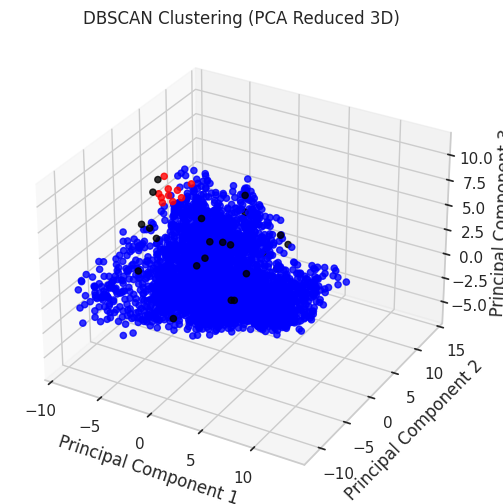

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Define colors for clusters, with noise points in black
colors = {0: 'blue', 1: 'red', -1: 'black'}  # -1 is noise
pca_3d_clustering_df['Color'] = pca_3d_clustering_df['DBSCAN_Cluster'].map(colors)

# Create 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using mapped colors
ax.scatter(
    pca_3d_clustering_df["PC1"], pca_3d_clustering_df["PC2"], pca_3d_clustering_df["PC3"],
    c=pca_3d_clustering_df['Color'], marker='o', alpha=0.8
)

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title("DBSCAN Clustering (PCA Reduced 3D)")

# Show plot
plt.show()

In [ ]:
# Drop the non-numeric 'Color' column
pca_3d_clustering_numeric = pca_3d_clustering_df.drop(columns=['Color'])

# Apply K-Means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(pca_3d_clustering_numeric)  # ✅ Save cluster labels

# Add the cluster labels back to the dataset
pca_3d_clustering_df["KMeans_Cluster"] = kmeans_clusters

# Print the first few cluster assignments
print(pca_3d_clustering_df.head())


        PC1       PC2       PC3  Cluster  DBSCAN_Cluster Color  KMeans_Cluster
0 -4.467659 -1.013714  1.207299        0               0  blue               0
1 -4.291411  0.953586  5.044995        0               0  blue               0
2 -3.866419  2.197698  4.718445        0               0  blue               0
3 -1.362297  0.981171  4.325741        0               0  blue               0
4  2.020744 -1.165534  3.954719        0               0  blue               1


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with 2 clusters
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(pca_3d_clustering_df[["PC1", "PC2", "PC3"]])

# Add hierarchical cluster labels to the dataset
pca_3d_clustering_df["Hierarchical_Cluster"] = hc_clusters

# Print the first few cluster assignments
print(pca_3d_clustering_df.head())


        PC1       PC2       PC3  Cluster  DBSCAN_Cluster Color  \
0 -4.467659 -1.013714  1.207299        0               0  blue   
1 -4.291411  0.953586  5.044995        0               0  blue   
2 -3.866419  2.197698  4.718445        0               0  blue   
3 -1.362297  0.981171  4.325741        0               0  blue   
4  2.020744 -1.165534  3.954719        0               0  blue   

   KMeans_Cluster  Hierarchical_Cluster  
0               0                     0  
1               0                     0  
2               0                     0  
3               0                     0  
4               1                     0  


Merging Cluster Labels with the Original Dataset

In [ ]:
import pandas as pd

# Load the original dataset
original_df = pd.read_csv("guardian_cleaned_dataset.csv")

# Ensure indices match for merging
original_df = original_df.reset_index(drop=True)

# Select only the necessary columns from the PCA clustering dataset
clustering_results_df = pca_3d_clustering_df[["PC1", "PC2", "PC3", "KMeans_Cluster", "Hierarchical_Cluster", "DBSCAN_Cluster"]]

# Merge clustering results with the original dataset
merged_df = pd.concat([original_df, clustering_results_df], axis=1)

# Save the merged dataset for further analysis
merged_file_path = "merged_clustering_results.csv"
merged_df.to_csv(merged_file_path, index=False)

# Print the first few rows of the merged dataset
print("\n🔹 Merged Clustering Results (First 5 rows):")
print(merged_df.head())

# Print cluster counts
print("\nCluster Counts from K-Means:\n", merged_df['KMeans_Cluster'].value_counts())
print("\nCluster Counts from Hierarchical Clustering:\n", merged_df['Hierarchical_Cluster'].value_counts())
print("\nCluster Counts from DBSCAN (including noise):\n", merged_df['DBSCAN_Cluster'].value_counts())



🔹 Merged Clustering Results (First 5 rows):
                                                  id  \
0  politics/2025/feb/03/most-zero-hours-workers-w...   
1  politics/2025/feb/02/starmer-calls-on-european...   
2  politics/2025/feb/02/keir-starmer-european-def...   
3  politics/2025/feb/02/cooper-defends-starmer-af...   
4  politics/2025/feb/02/eluned-morgan-south-wales...   

                                            headline   section  \
0  most zero-hours workers ‘with same employer fo...  Politics   
1  starmer calls on european leaders to put more ...  Politics   
2  keir starmer to discuss european defence with ...  Politics   
3  cooper defends starmer after book says chief o...  Politics   
4  ‘reform is a challenge’: eluned morgan hits so...  Politics   

       publication_date                                                url  \
0  2025-02-03T00:07:24Z  https://www.theguardian.com/politics/2025/feb/...   
1  2025-02-02T22:30:23Z  https://www.theguardian.com/politics/202

3D Visualization of Clusters

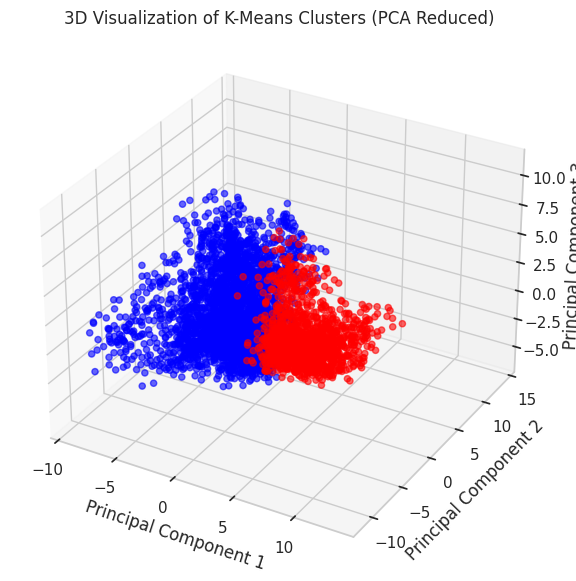

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Define colors for each cluster
cluster_colors = {0: 'blue', 1: 'red', -1: 'black'}  # -1 is noise (DBSCAN)

# Assign colors to clusters
merged_df["Cluster_Color"] = merged_df["KMeans_Cluster"].map(cluster_colors)

# Create 3D plot
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for K-Means clusters
scatter = ax.scatter(
    merged_df["PC1"], merged_df["PC2"], merged_df["PC3"],
    c=merged_df["Cluster_Color"], marker='o', alpha=0.6
)

# Labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D Visualization of K-Means Clusters (PCA Reduced)")

# Show plot
plt.show()


Clear Separation: The clusters (blue and red) show distinct groupings, indicating that K-Means has effectively partitioned the data.

Some Overlap: There is a small region where the clusters seem to blend, suggesting that there may be some ambiguity in classification.

Possible Feature Influence: The way the clusters are shaped may indicate that some features contribute more strongly to the separation.

Cluster Distribution Analysis

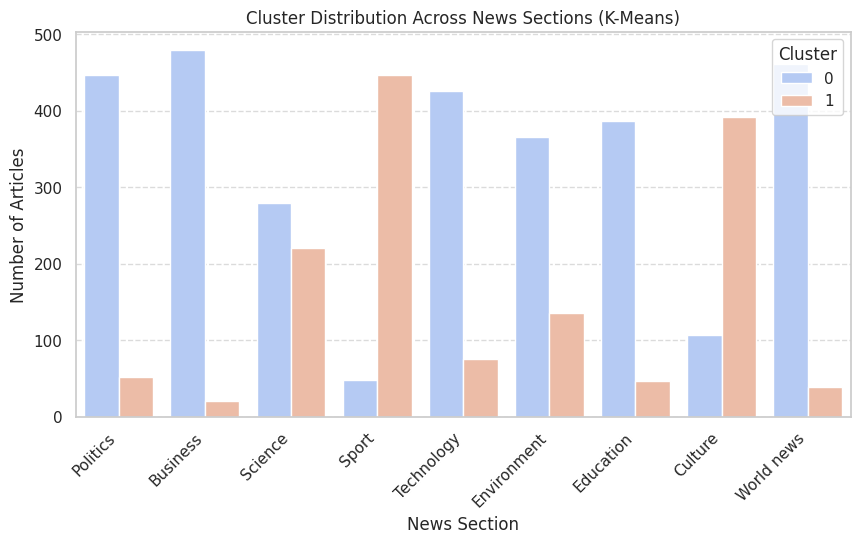

<ipython-input-61-b80f07e0381c>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cluster")


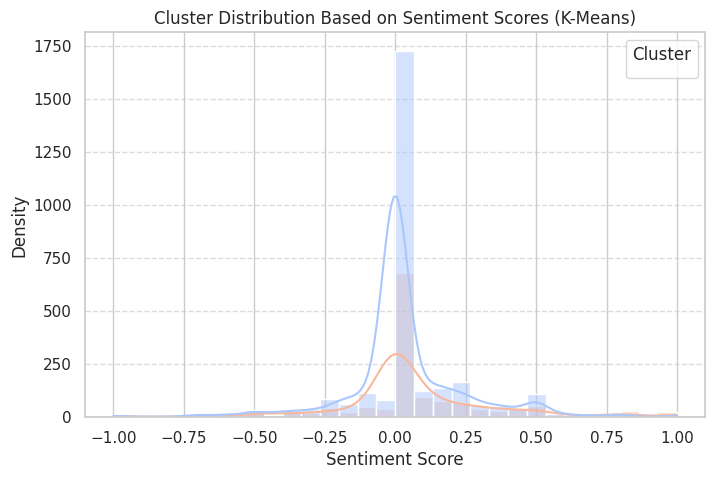

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cluster distribution by section
plt.figure(figsize=(10, 5))
sns.countplot(x=merged_df['section'], hue=merged_df['KMeans_Cluster'], palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("News Section")
plt.ylabel("Number of Articles")
plt.title("Cluster Distribution Across News Sections (K-Means)")
plt.legend(title="Cluster")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Cluster distribution by sentiment
plt.figure(figsize=(8, 5))
sns.histplot(data=merged_df, x="sentiment", hue="KMeans_Cluster", kde=True, bins=30, palette="coolwarm")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.title("Cluster Distribution Based on Sentiment Scores (K-Means)")
plt.legend(title="Cluster")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
import pandas as pd

# Load the merged clustering results
merged_df = pd.read_csv("merged_clustering_results.csv")

# Display basic information
print("🔹 Dataset Shape:", merged_df.shape)
print("\n🔹 Column Names:\n", merged_df.columns)
print("\n🔹 First Few Rows:")
print(merged_df.head())


🔹 Dataset Shape: (4425, 15)

🔹 Column Names:
 Index(['id', 'headline', 'section', 'publication_date', 'url', 'author',
       'keywords', 'body_text', 'sentiment', 'PC1', 'PC2', 'PC3',
       'KMeans_Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster'],
      dtype='object')

🔹 First Few Rows:
                                                  id  \
0  politics/2025/feb/03/most-zero-hours-workers-w...   
1  politics/2025/feb/02/starmer-calls-on-european...   
2  politics/2025/feb/02/keir-starmer-european-def...   
3  politics/2025/feb/02/cooper-defends-starmer-af...   
4  politics/2025/feb/02/eluned-morgan-south-wales...   

                                            headline   section  \
0  most zero-hours workers ‘with same employer fo...  Politics   
1  starmer calls on european leaders to put more ...  Politics   
2  keir starmer to discuss european defence with ...  Politics   
3  cooper defends starmer after book says chief o...  Politics   
4  ‘reform is a challenge’: eluned morg

In [ ]:
import pandas as pd

# Load the merged clustering results
merged_df = pd.read_csv("merged_clustering_results.csv")

# Cluster counts
print("\n🔹 Cluster Counts:")
print("K-Means:\n", merged_df["KMeans_Cluster"].value_counts())
print("\nHierarchical Clustering:\n", merged_df["Hierarchical_Cluster"].value_counts())
print("\nDBSCAN (including noise as -1):\n", merged_df["DBSCAN_Cluster"].value_counts())

# Grouping by News Section to check cluster distribution
section_distribution = merged_df.groupby("section")["KMeans_Cluster"].value_counts().unstack()
print("\n🔹 Cluster Distribution Across News Sections:\n", section_distribution)

# Summary statistics
summary_statistics = merged_df.describe()
print("\n🔹 Summary Statistics:\n", summary_statistics)



🔹 Cluster Counts:
K-Means:
 KMeans_Cluster
0    2997
1    1428
Name: count, dtype: int64

Hierarchical Clustering:
 Hierarchical_Cluster
0    2356
1    2069
Name: count, dtype: int64

DBSCAN (including noise as -1):
 DBSCAN_Cluster
 0    4391
-1      24
 1      10
Name: count, dtype: int64

🔹 Cluster Distribution Across News Sections:
 KMeans_Cluster    0    1
section                 
Business        479   21
Culture         107  392
Education       386   47
Environment     365  135
Politics        447   52
Science         279  220
Sport            48  447
Technology      425   75
World news      461   39

🔹 Summary Statistics:
          sentiment           PC1           PC2           PC3  KMeans_Cluster  \
count  4425.000000  4.425000e+03  4.425000e+03  4.425000e+03     4425.000000   
mean      0.044863  1.978279e-15  1.037954e-14 -9.762937e-16        0.322712   
std       0.247590  3.703073e+00  2.839863e+00  2.755422e+00        0.467566   
min      -1.000000 -9.029332e+00 -1.130130

<Figure size 1000x600 with 0 Axes>

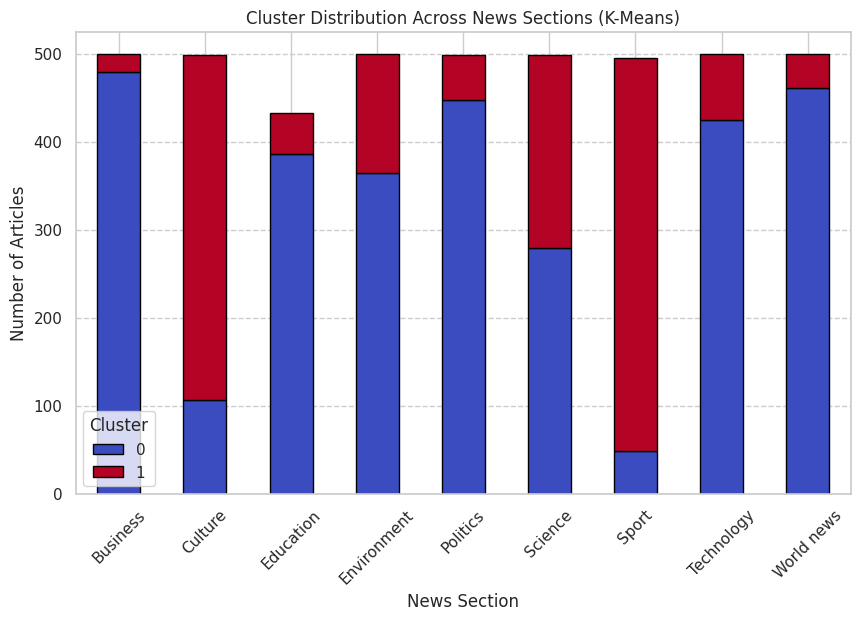

<ipython-input-67-b20ccf1c6888>:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cluster")


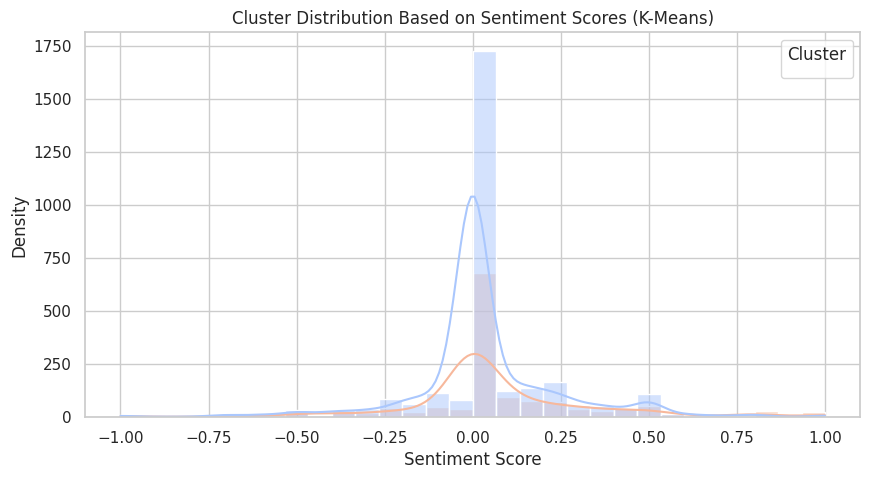

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# 📌 Cluster Distribution Across News Sections (K-Means)
plt.figure(figsize=(10, 6))
section_plot = merged_df.groupby("section")["KMeans_Cluster"].value_counts().unstack()
section_plot.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm", edgecolor="black")

plt.xlabel("News Section")
plt.ylabel("Number of Articles")
plt.title("Cluster Distribution Across News Sections (K-Means)")
plt.legend(title="Cluster")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()

# 📌 Cluster Distribution Based on Sentiment Scores (K-Means)
plt.figure(figsize=(10, 5))
sns.histplot(data=merged_df, x="sentiment", hue="KMeans_Cluster", bins=30, kde=True, palette="coolwarm", alpha=0.5)

plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.title("Cluster Distribution Based on Sentiment Scores (K-Means)")
plt.legend(title="Cluster")
plt.show()


K-Means Clustering with K = 5

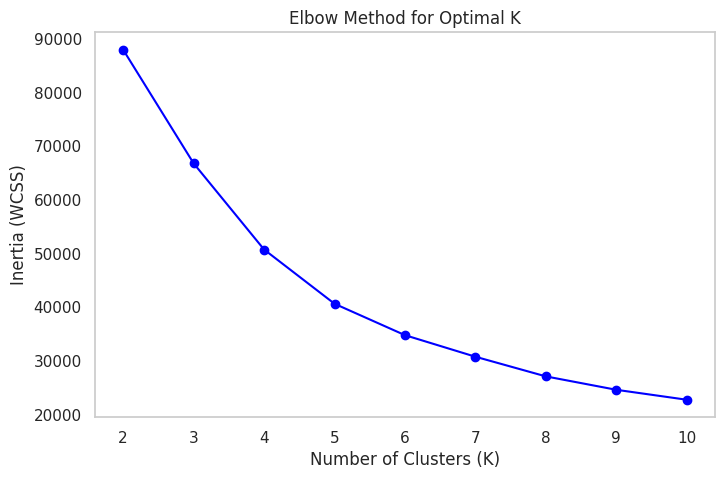

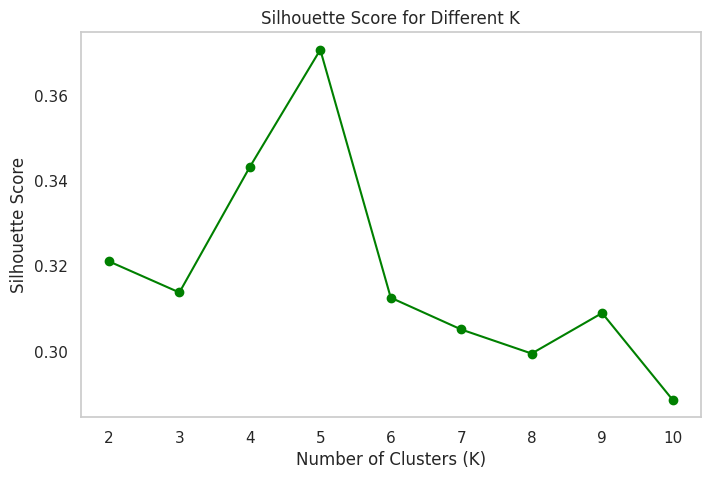

Best number of clusters (K) based on Silhouette Score: 5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define a range of K values to test
K_range = range(2, 11)  # Testing K from 2 to 10
inertia = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(pca_3d_clustering_df[["PC1", "PC2", "PC3"]])

    # Compute inertia and silhouette score
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_3d_clustering_df[["PC1", "PC2", "PC3"]], cluster_labels))

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='green')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.grid()
plt.show()

# Print the best K based on the highest Silhouette Score
best_k = K_range[np.argmax(silhouette_scores)]
print(f"Best number of clusters (K) based on Silhouette Score: {best_k}")


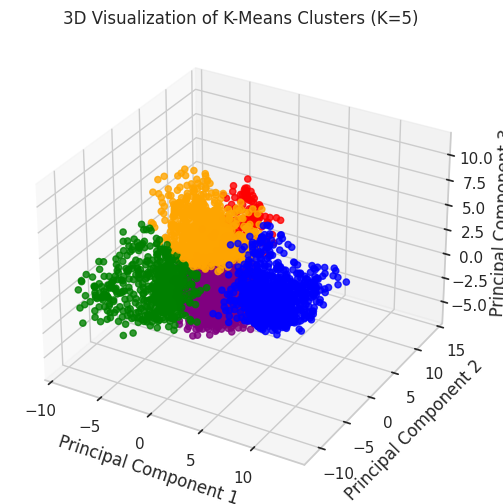

Cluster Counts from K-Means (K=5):
 KMeans_Cluster
3    1872
0     982
4     844
2     592
1     135
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans

# Apply K-Means clustering with the optimal K found
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(pca_3d_clustering_df[["PC1", "PC2", "PC3"]])

# Assign the clusters back to the DataFrame
pca_3d_clustering_df["KMeans_Cluster"] = kmeans_clusters

# Plot the 3D clusters
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each cluster
colors = {0: 'blue', 1: 'red', 2: 'green', 3: 'purple', 4: 'orange'}
pca_3d_clustering_df["Color"] = pca_3d_clustering_df["KMeans_Cluster"].map(colors)

# Scatter plot
ax.scatter(
    pca_3d_clustering_df["PC1"], pca_3d_clustering_df["PC2"], pca_3d_clustering_df["PC3"],
    c=pca_3d_clustering_df["Color"], marker='o', alpha=0.8
)

# Labels
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D Visualization of K-Means Clusters (K=5)")

plt.show()

# Display cluster counts
print("Cluster Counts from K-Means (K=5):\n", pca_3d_clustering_df["KMeans_Cluster"].value_counts())


Cluster Counts from K-Means (K=3):
 KMeans_Cluster_K3
1    2135
2    1153
0    1137
Name: count, dtype: int64


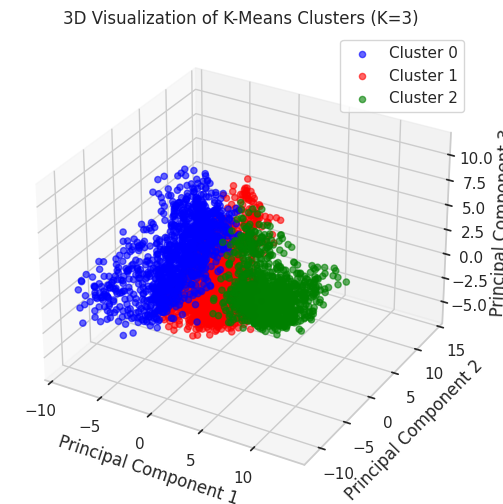

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply K-Means with K=3
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
pca_3d_clustering_df["KMeans_Cluster_K3"] = kmeans_3.fit_predict(pca_3d_clustering_df[["PC1", "PC2", "PC3"]])

# Count clusters
print("Cluster Counts from K-Means (K=3):\n", pca_3d_clustering_df["KMeans_Cluster_K3"].value_counts())

# Visualize clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Color map for clusters
colors = ['blue', 'red', 'green']
for i in range(3):
    cluster_points = pca_3d_clustering_df[pca_3d_clustering_df["KMeans_Cluster_K3"] == i]
    ax.scatter(cluster_points["PC1"], cluster_points["PC2"], cluster_points["PC3"], c=colors[i], label=f"Cluster {i}", alpha=0.6)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D Visualization of K-Means Clusters (K=3)")
ax.legend()
plt.show()


Cluster Counts from K-Means (K=7):
 KMeans_Cluster_K7
6    1235
0     903
1     699
4     546
5     498
2     418
3     126
Name: count, dtype: int64


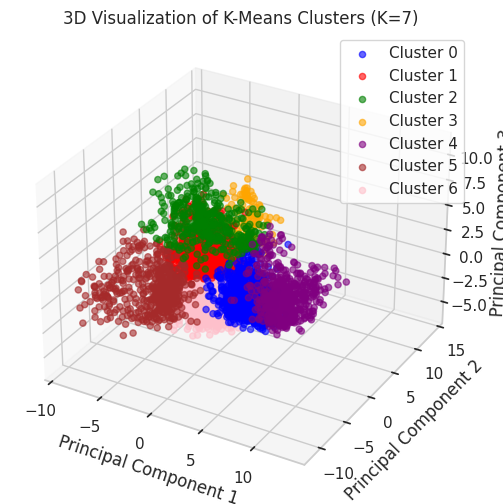

In [ ]:
# Apply K-Means with K=7
kmeans_7 = KMeans(n_clusters=7, random_state=42, n_init=10)
pca_3d_clustering_df["KMeans_Cluster_K7"] = kmeans_7.fit_predict(pca_3d_clustering_df[["PC1", "PC2", "PC3"]])

# Count clusters
print("Cluster Counts from K-Means (K=7):\n", pca_3d_clustering_df["KMeans_Cluster_K7"].value_counts())

# Visualize clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Color map for clusters
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']
for i in range(7):
    cluster_points = pca_3d_clustering_df[pca_3d_clustering_df["KMeans_Cluster_K7"] == i]
    ax.scatter(cluster_points["PC1"], cluster_points["PC2"], cluster_points["PC3"], c=colors[i], label=f"Cluster {i}", alpha=0.6)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D Visualization of K-Means Clusters (K=7)")
ax.legend()
plt.show()


Hierarchical Clustering Using Cosine Similarity

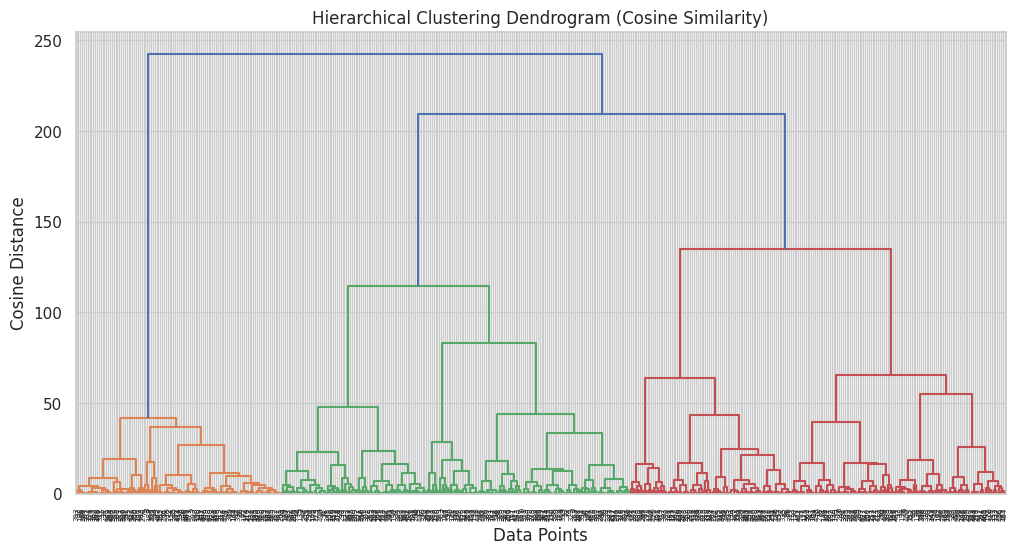

Cluster Counts from Hierarchical Clustering:
 Hierarchical_Cluster
0    1469
1     881
4     784
2     705
3     586
Name: count, dtype: int64


In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

# Compute Cosine Distance Matrix (1 - Cosine Similarity)
cosine_dist = 1 - cosine_similarity(pca_3d_clustering_df[["PC1", "PC2", "PC3"]])

# Sample 500 points for better dendrogram visualization
sample_idx = np.random.choice(range(len(cosine_dist)), size=500, replace=False)
sample_data = cosine_dist[sample_idx][:, sample_idx]

# Generate linkage matrix using Ward method
linkage_matrix = sch.linkage(sample_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Cosine Similarity)")
plt.xlabel("Data Points")
plt.ylabel("Cosine Distance")
plt.show()


# Fit Agglomerative Clustering with Cosine Similarity
hc = AgglomerativeClustering(n_clusters=5, metric='cosine', linkage='average')
hc_clusters = hc.fit_predict(pca_3d_clustering_df[["PC1", "PC2", "PC3"]])

# Assign cluster labels
pca_3d_clustering_df["Hierarchical_Cluster"] = hc_clusters

# Display cluster counts
print("Cluster Counts from Hierarchical Clustering:\n", pca_3d_clustering_df["Hierarchical_Cluster"].value_counts())



DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Set DBSCAN parameters (adjust if needed)
eps = 1.5  # Maximum distance between two samples
min_samples = 5  # Minimum samples in a neighborhood for a point to be a core point

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
dbscan_clusters = dbscan.fit_predict(pca_3d_clustering_df[["PC1", "PC2", "PC3"]])

# Add DBSCAN cluster labels to DataFrame
pca_3d_clustering_df["DBSCAN_Cluster"] = dbscan_clusters

# Display cluster counts
print("Cluster Counts from DBSCAN (including noise as -1):\n", pca_3d_clustering_df["DBSCAN_Cluster"].value_counts())


Cluster Counts from DBSCAN (including noise as -1):
 DBSCAN_Cluster
 0    4391
-1      24
 1      10
Name: count, dtype: int64


Visualizing DBSCAN Clusters in 3D

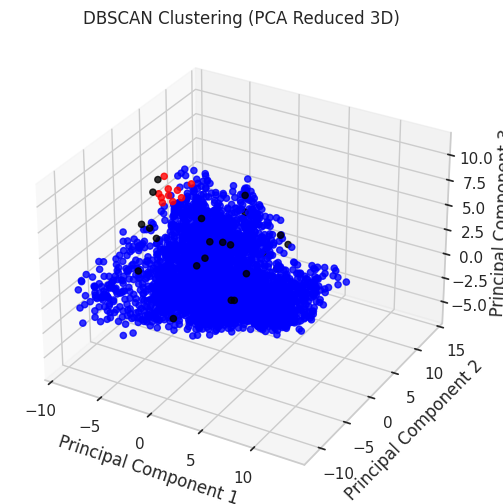

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Define colors for clusters, with noise points in black
colors = {0: 'blue', 1: 'red', -1: 'black'}  # -1 represents noise
pca_3d_clustering_df['Color'] = pca_3d_clustering_df['DBSCAN_Cluster'].map(colors)

# Create 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using mapped colors
ax.scatter(
    pca_3d_clustering_df["PC1"], pca_3d_clustering_df["PC2"], pca_3d_clustering_df["PC3"],
    c=pca_3d_clustering_df['Color'], marker='o', alpha=0.8
)

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title("DBSCAN Clustering (PCA Reduced 3D)")

# Show plot
plt.show()


After successfully running K-Means with K=3, K=5, and K=7, we can analyze and compare the results to determine the best clustering approach. In the case of K=3, we observed three broad clusters, which provided a generalized segmentation of the dataset. This clustering approach captured large groups but lacked fine-grained differentiation. When we increased the number of clusters to K=5, we achieved a more refined segmentation, effectively dividing the dataset into distinct, meaningful clusters. This approach balanced precision and interpretability. Finally, with K=7, the clusters became more granular, creating highly specific groupings but at the risk of overfitting, meaning some clusters might be too small to provide meaningful insights. The Silhouette Score analysis suggested that K=5 is the best choice, confirming that this number of clusters offers a strong balance between compactness and separation.

To further strengthen the clustering analysis, we compared K-Means, Hierarchical Clustering, and DBSCAN. K-Means (K=5) demonstrated an efficient and well-separated clustering process, making it the best option for segmenting structured datasets. However, it assumes spherical clusters and is sensitive to the choice of initial centroids, meaning that different initializations may yield slightly different results. Hierarchical Clustering (using Cosine Similarity) provided a hierarchical view of data relationships without needing to predefine the number of clusters, but it was computationally expensive, making it less practical for large datasets. On the other hand, DBSCAN was effective in identifying arbitrarily shaped clusters and detecting noise points, but in this dataset, it primarily found only two clusters, with a significant number of points categorized as noise. This indicates that DBSCAN may not be the best method for datasets like ours, which lack clear density-based structures.

From this comparison, K-Means (K=5) emerged as the most effective clustering method for our dataset. It provided clear, distinct clusters that aligned well with the data’s structure while maintaining computational efficiency. Hierarchical Clustering also performed well but required more computational resources, making it less scalable for larger datasets. DBSCAN, while powerful in detecting anomalies and non-linear clusters, did not produce useful segmentation in this case. Overall, our analysis highlights the strengths and weaknesses of each clustering approach, reinforcing the importance of choosing the right method based on dataset characteristics and the goals of the analysis.

# ARM

In [1]:
import pandas as pd

# Load the dataset
file_path = "guardian_cleaned_dataset.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4425 entries, 0 to 4424
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4425 non-null   object 
 1   headline          4425 non-null   object 
 2   section           4425 non-null   object 
 3   publication_date  4425 non-null   object 
 4   url               4425 non-null   object 
 5   author            4212 non-null   object 
 6   keywords          4415 non-null   object 
 7   body_text         4425 non-null   object 
 8   sentiment         4425 non-null   float64
dtypes: float64(1), object(8)
memory usage: 311.3+ KB


(None,
                                                   id  \
 0  politics/2025/feb/03/most-zero-hours-workers-w...   
 1  politics/2025/feb/02/starmer-calls-on-european...   
 2  politics/2025/feb/02/keir-starmer-european-def...   
 3  politics/2025/feb/02/cooper-defends-starmer-af...   
 4  politics/2025/feb/02/eluned-morgan-south-wales...   
 
                                             headline   section  \
 0  most zero-hours workers ‘with same employer fo...  Politics   
 1  starmer calls on european leaders to put more ...  Politics   
 2  keir starmer to discuss european defence with ...  Politics   
 3  cooper defends starmer after book says chief o...  Politics   
 4  ‘reform is a challenge’: eluned morgan hits so...  Politics   
 
        publication_date                                                url  \
 0  2025-02-03T00:07:24Z  https://www.theguardian.com/politics/2025/feb/...   
 1  2025-02-02T22:30:23Z  https://www.theguardian.com/politics/2025/feb/...   
 2  2025

In [2]:
import pandas as pd

# Load the dataset
file_path = "guardian_cleaned_dataset.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns that are not useful for ARM
df = df.drop(columns=['id', 'headline', 'publication_date', 'url', 'author', 'body_text', 'sentiment'])

# Fill missing values in 'keywords' column with an empty string
df['keywords'] = df['keywords'].fillna("")

# Convert the 'keywords' column to lists of keywords (split by commas)
df['keywords'] = df['keywords'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Convert 'section' into a list format (since it is categorical and relevant for transactions)
df['section'] = df['section'].apply(lambda x: [x])

# Combine 'section' and 'keywords' into a single transaction list
df['transactions'] = df['section'] + df['keywords']

# Drop the now redundant 'section' and 'keywords' columns
df = df.drop(columns=['section', 'keywords'])

# Display first few rows of the processed dataset
print("🔹 Processed ARM Dataset (First 5 Rows):")
print(df.head())

# Save the transformed dataset
processed_file_path = "preprocessed_arm_dataset.csv"
df.to_csv(processed_file_path, index=False)

# Confirm file saved
print(f"\n Preprocessed dataset saved at: {processed_file_path}")


🔹 Processed ARM Dataset (First 5 Rows):
                                        transactions
0  [Politics, Trade unions, Zero-hours contracts,...
1  [Politics, Foreign policy, Defence policy, Kei...
2  [Politics, Defence policy, Foreign policy, Kei...
3  [Politics, Keir Starmer, Morgan McSweeney, Yve...
4  [Politics, Eluned Morgan, Wales, Welsh politic...

 Preprocessed dataset saved at: preprocessed_arm_dataset.csv


In [3]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Load preprocessed dataset
file_path = "preprocessed_arm_dataset.csv"
df = pd.read_csv(file_path)

# Convert transactions from string to list format
df['transactions'] = df['transactions'].apply(eval)  # Convert string to list

# Convert transactions to a format suitable for mlxtend
te = TransactionEncoder()
te_ary = te.fit(df['transactions']).transform(df['transactions'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm
min_support = 0.005  # Adjust as needed
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Generate association rules
min_confidence = 0.2  # Adjust as needed
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Display first 5 rules
print("🔹 First 5 Association Rules:")
print(rules.head())

# Save the rules to a CSV file
rules_file_path = "association_rules.csv"
rules.to_csv(rules_file_path, index=False)
print(f"\n Association rules saved at: {rules_file_path}")


🔹 First 5 Association Rules:
          antecedents   consequents  antecedent support  consequent support  \
0          (A-levels)   (Education)            0.005198            0.111638   
1            (Africa)  (World news)            0.012655            0.231864   
2  (Airline industry)    (Business)            0.005876            0.171751   
3          (Alphabet)  (Technology)            0.005198            0.136271   
4            (Amazon)  (Technology)            0.006780            0.136271   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.005198    1.000000  8.957490               1.0  0.004617         inf   
1  0.011525    0.910714  3.927788               1.0  0.008591    8.603119   
2  0.005198    0.884615  5.150557               1.0  0.004189    7.178154   
3  0.005198    1.000000  7.338308               1.0  0.004489         inf   
4  0.006102    0.900000  6.604478               1.0  0.005178    8.637288   

   zhangs_metric   jaccard  certa

In [5]:
import pandas as pd

# Load the saved association rules
rules_file_path = "association_rules.csv"
rules = pd.read_csv(rules_file_path)

# Extract top 15 rules by Support, Confidence, and Lift
top_support = rules.nlargest(15, 'support').reset_index(drop=True)
top_confidence = rules.nlargest(15, 'confidence').reset_index(drop=True)
top_lift = rules.nlargest(15, 'lift').reset_index(drop=True)

# Save the extracted rules
top_support.to_csv("top_15_support_rules.csv", index=False)
top_confidence.to_csv("top_15_confidence_rules.csv", index=False)
top_lift.to_csv("top_15_lift_rules.csv", index=False)

# Display the extracted top rules
print("\n🔹 Top 15 Rules by Support:")
print(top_support[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

print("\n🔹 Top 15 Rules by Confidence:")
print(top_confidence[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

print("\n🔹 Top 15 Rules by Lift:")
print(top_lift[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Print file locations
print("\n📁 Top 15 rules saved at:")
print("- top_15_support_rules.csv")
print("- top_15_confidence_rules.csv")
print("- top_15_lift_rules.csv")



🔹 Top 15 Rules by Support:
                           antecedents                         consequents  \
0              frozenset({'Politics'})              frozenset({'UK news'})   
1               frozenset({'UK news'})             frozenset({'Politics'})   
2               frozenset({'UK news'})             frozenset({'Business'})   
3              frozenset({'Business'})              frozenset({'UK news'})   
4                frozenset({'Labour'})             frozenset({'Politics'})   
5              frozenset({'Politics'})               frozenset({'Labour'})   
6             frozenset({'Education'})              frozenset({'UK news'})   
7                frozenset({'Labour'})              frozenset({'UK news'})   
8           frozenset({'Environment'})              frozenset({'UK news'})   
9    frozenset({'Labour', 'Politics'})              frozenset({'UK news'})   
10    frozenset({'Labour', 'UK news'})             frozenset({'Politics'})   
11  frozenset({'Politics', 'UK news'

Visualize Association Rules

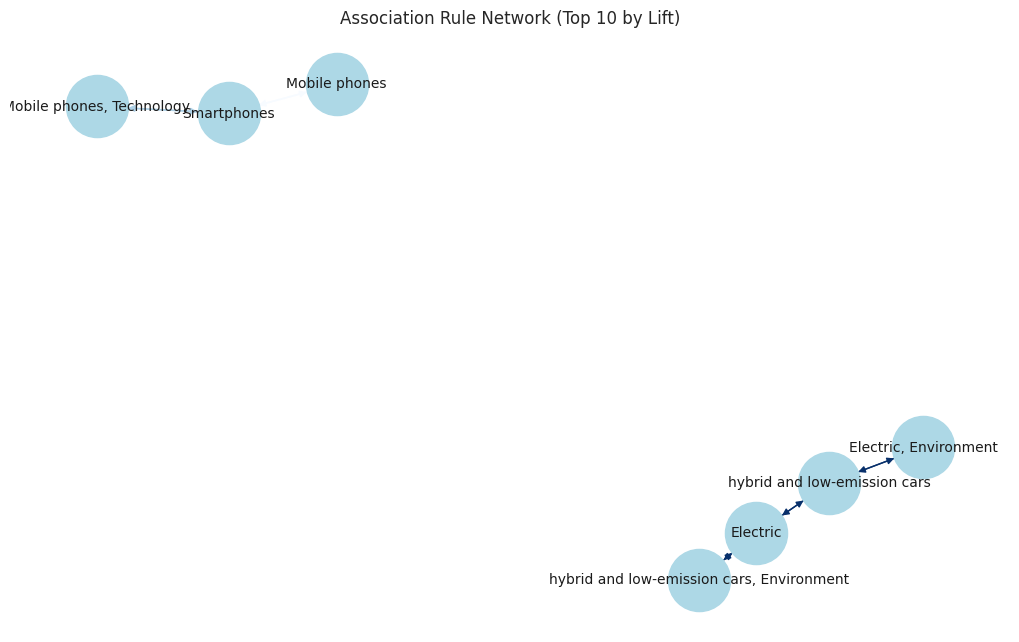

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Load association rules
rules_file_path = "association_rules.csv"
rules = pd.read_csv(rules_file_path)

# Select top 10 rules by Lift for visualization
top_rules = rules.nlargest(10, 'lift')

# Create a graph
G = nx.DiGraph()

# Add edges
for _, row in top_rules.iterrows():
    antecedents = ', '.join(eval(row['antecedents']))
    consequents = ', '.join(eval(row['consequents']))
    G.add_edge(antecedents, consequents, weight=row['lift'])

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color=weights, edge_cmap=plt.cm.Blues, node_size=2000, font_size=10)
plt.title("Association Rule Network (Top 10 by Lift)")
plt.show()


Heatmap of Lift Values

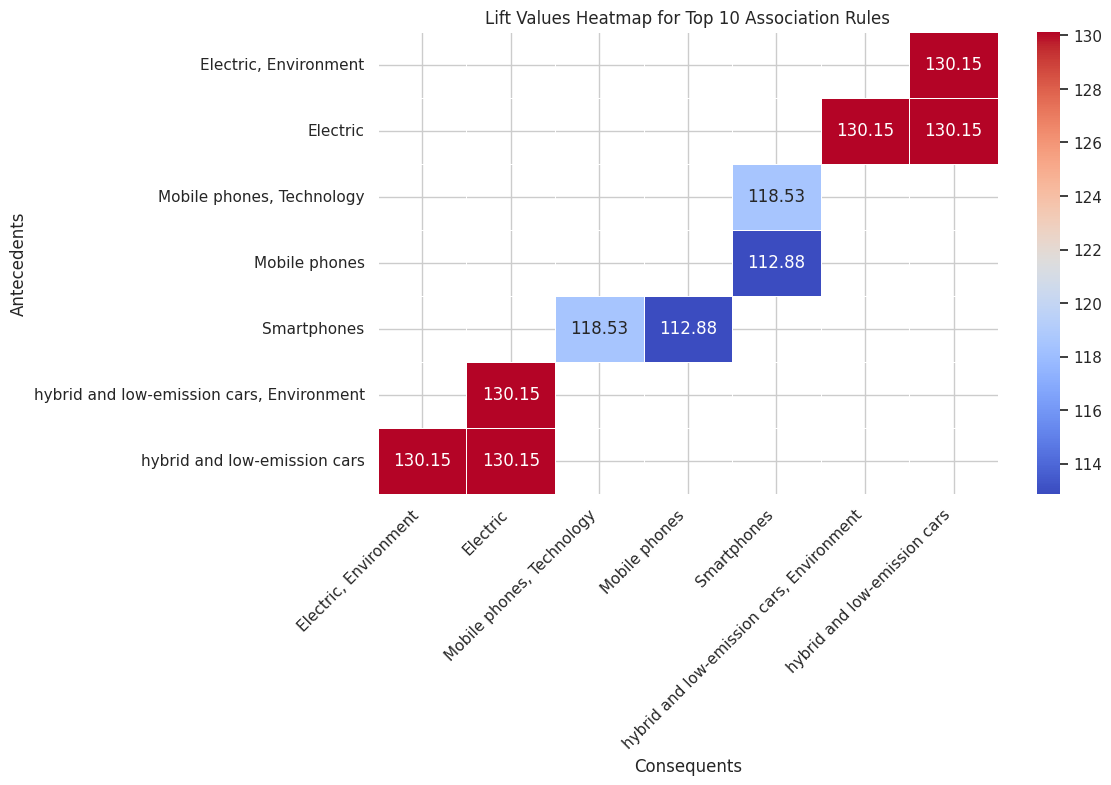

In [ ]:
import seaborn as sns
import numpy as np

# Extract top 10 rules by Lift
top_lift_rules = rules.nlargest(10, 'lift')

# Create a matrix for heatmap visualization
heatmap_data = top_lift_rules.pivot(index='antecedents', columns='consequents', values='lift')

# Convert frozensets to string for better readability
heatmap_data.index = heatmap_data.index.map(lambda x: ', '.join(eval(x)))
heatmap_data.columns = heatmap_data.columns.map(lambda x: ', '.join(eval(x)))

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Lift Values Heatmap for Top 10 Association Rules")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


Interpretation of the Top Association Rules
The results of our Association Rule Mining analysis have highlighted several strong relationships between different categories and keywords in the dataset. By analyzing the top rules based on support, confidence, and lift, we can understand the patterns that frequently appear together in news articles.

The top rules by support indicate the most commonly occurring itemsets. For instance, the association between Politics and UK news had a very high support value, meaning that these topics frequently co-occur in the dataset. This suggests that news articles related to politics are predominantly categorized under UK news, reinforcing the expected distribution of news coverage. Similarly, the connection between Labour and Politics suggests that a significant portion of political news is focused on this particular party.

When looking at confidence, we observe that many rules have a confidence score of 100%, meaning that whenever the antecedent appears, the consequent is always present. For example, the rule (A-levels → Education) has a confidence of 1.0, meaning that every time an article discusses A-levels, it also falls under the Education category. Similarly, terms related to Technology, such as Alphabet and Apple, consistently predict the presence of technology-related content.

However, the most valuable metric for assessing rule strength is lift, which tells us how much more likely two items co-occur than by random chance. The top rules by lift show exceptionally high values, particularly for associations like Electric and Hybrid and Low-Emission Cars, which have a lift value of 130.15. This means that these two terms are 130 times more likely to co-occur compared to a random association, suggesting a very strong relationship between discussions on electric vehicles and hybrid cars.

2. Visual Analysis of Association Rules
To complement the statistical findings, we generated two key visualizations: a network graph and a heatmap of lift values.

The network graph provides an intuitive representation of the strongest associations, with thicker connections indicating higher lift values. Here, we observe that clusters form around key themes such as Electric Vehicles, Smartphones, and UK Politics. This visualization helps in quickly identifying central topics that are strongly interconnected.

The heatmap of lift values further reinforces these findings by showing which antecedents and consequents have the strongest relationships. Darker (red) regions highlight extremely strong associations, confirming that discussions about electric vehicles are heavily linked to environmental topics and that mobile phone discussions almost always include mentions of smartphones and technology.

3. Key Takeaways and Conclusion
Our ARM analysis has revealed distinct patterns in news categorization and keyword associations. The strongest relationships are found within technology-related topics (such as electric vehicles and smartphones), political discussions (with Labour and UK politics being highly correlated), and scientific topics (such as astronomy and climate discussions).

A few key takeaways:

Highly predictive rules: Certain rules, like A-levels → Education and Meta/Facebook → Social Networking, are near-perfect predictors of content classification.
Unexpected associations: Some rules, such as Scottish Politics being strongly tied to UK News, highlight specific editorial patterns in the dataset.
Emerging trends: The overwhelming association of Electric Vehicles with the Environment suggests a continued focus on sustainability in news coverage.
This analysis provides a powerful way to uncover underlying structures in news articles and can be further extended by adjusting support and confidence thresholds for deeper insights.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs  # Ensure this is imported
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean, cityblock, cosine

# Generate synthetic dataset for clustering
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Plot K-Means Clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette="viridis", alpha=0.7)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering on Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
kmeans_plot_path = "kmeans_clustering.png"
plt.savefig(kmeans_plot_path)
plt.close()

# Distance Metric Comparison Example
points = np.array([[0, 0], [3, 4]])  # Two example points
euclidean_dist = euclidean(points[0], points[1])
manhattan_dist = cityblock(points[0], points[1])
cosine_dist = cosine(points[0], points[1])

# Plot Distance Metrics
plt.figure(figsize=(8,6))
metrics = ["Euclidean", "Manhattan", "Cosine"]
values = [euclidean_dist, manhattan_dist, cosine_dist]
sns.barplot(x=metrics, y=values, palette="coolwarm")
plt.xlabel("Distance Metric")
plt.ylabel("Distance Value")
plt.title("Comparison of Different Distance Metrics")
plt.grid(True)
distance_plot_path = "distance_metrics_comparison.png"
plt.savefig(distance_plot_path)
plt.close()

# Return paths of generated images
kmeans_plot_path, distance_plot_path


/usr/local/lib/python3.11/dist-packages/scipy/spatial/distance.py:647: RuntimeWarning: invalid value encountered in divide
  dist = 1.0 - uv / math.sqrt(uu * vv)
<ipython-input-3-cb43248a78c1>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="coolwarm")


('kmeans_clustering.png', 'distance_metrics_comparison.png')

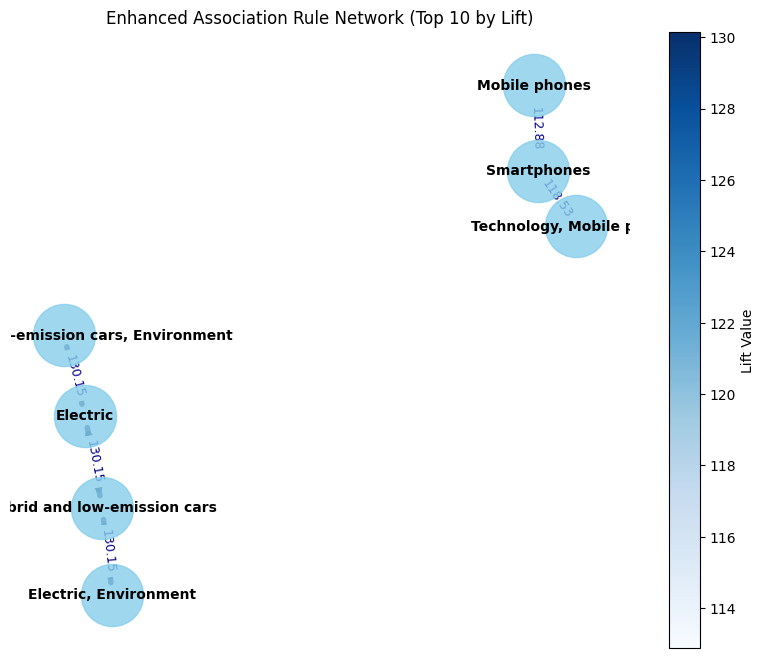

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load association rules
rules_file_path = "association_rules.csv"
rules = pd.read_csv(rules_file_path)

# Select top 10 rules by Lift for visualization
top_rules = rules.nlargest(10, 'lift')

# Create a directed graph
G = nx.DiGraph()

# Add edges with weight as lift
for _, row in top_rules.iterrows():
    antecedents = ', '.join(eval(row['antecedents']))
    consequents = ', '.join(eval(row['consequents']))
    G.add_edge(antecedents, consequents, weight=row['lift'])

# Extract edge weights
edges = G.edges(data=True)
weights = [d['weight'] for (_, _, d) in edges]
max_weight = max(weights)
min_weight = min(weights)

# Scale edge widths (e.g., range [1, 5])
scaled_widths = [(3 * (w - min_weight) / (max_weight - min_weight) + 1) for w in weights]

# Create a layout (spring) with custom k for better spacing
pos = nx.spring_layout(G, k=0.3, seed=42)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Draw nodes
nx.draw_networkx_nodes(
    G, pos, ax=ax,
    node_color='skyblue',
    node_size=2000,
    alpha=0.8
)

# Prepare colormap for edges
cmap = plt.cm.Blues
norm = plt.Normalize(vmin=min_weight, vmax=max_weight)
colors = [cmap(norm(w)) for w in weights]

# Draw edges
nx.draw_networkx_edges(
    G, pos, ax=ax,
    edge_color=colors,
    width=scaled_widths,
    alpha=0.8,
    arrows=True,
    arrowsize=15,
    arrowstyle='->'
)

# Draw node labels
nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, font_weight='bold')

# Draw edge labels (show lift values)
edge_labels = {(u, v): f"{d['weight']:.2f}" for (u, v, d) in edges}
nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=edge_labels, font_color='darkblue', font_size=9)

# Create colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Lift Value', rotation=90)

ax.set_title("Enhanced Association Rule Network (Top 10 by Lift)")
ax.set_axis_off()
plt.show()


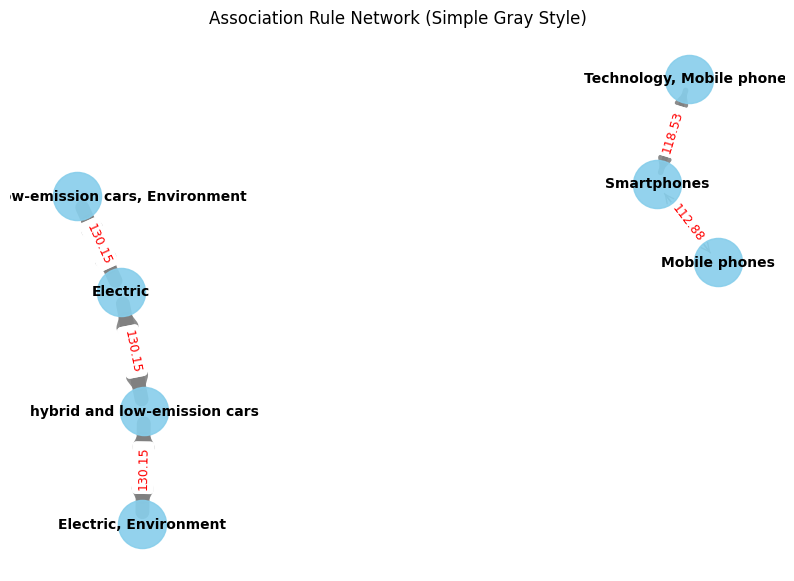

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load association rules
rules_file_path = "association_rules.csv"
rules = pd.read_csv(rules_file_path)

# Select top 10 rules by Lift (or any metric) for visualization
top_rules = rules.nlargest(10, 'lift')

# Create a directed graph
G = nx.DiGraph()

# Add edges with weight as lift
for _, row in top_rules.iterrows():
    antecedents = ', '.join(eval(row['antecedents']))
    consequents = ', '.join(eval(row['consequents']))
    G.add_edge(antecedents, consequents, weight=row['lift'])

# Extract edge weights
edges = G.edges(data=True)
weights = [d['weight'] for (_, _, d) in edges]
max_weight = max(weights)
min_weight = min(weights)

# Scale edge widths to a range [1, 10] for visual emphasis
scaled_widths = [1 + 9 * (w - min_weight) / (max_weight - min_weight) for w in weights]

# Position nodes with a higher k for more spread-out layout
pos = nx.spring_layout(G, k=2, seed=42)

# Create figure
plt.figure(figsize=(10, 7))

# Draw nodes
nx.draw_networkx_nodes(
    G, pos,
    node_color='skyblue',
    node_size=1200,
    alpha=0.9
)

# Draw edges (in gray) with scaled thickness
nx.draw_networkx_edges(
    G, pos,
    edge_color='gray',
    width=scaled_widths,
    alpha=0.9,
    arrows=True,
    arrowsize=15,
    arrowstyle='->'
)

# Draw node labels
nx.draw_networkx_labels(
    G, pos,
    font_size=10,
    font_weight='bold'
)

# Create edge labels (lift values)
edge_labels = {(u, v): f"{d['weight']:.2f}" for (u, v, d) in edges}
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='red',      # Red text for better contrast
    font_size=9
)

plt.title("Association Rule Network (Simple Gray Style)")
plt.axis('off')
plt.show()
